In [34]:
import tensorflow as tf


In [35]:
mnist = tf.keras.datasets.mnist

In [36]:
(x_train,y_train),(x_test, y_test) = mnist.load_data()

In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
import matplotlib.pyplot as plt

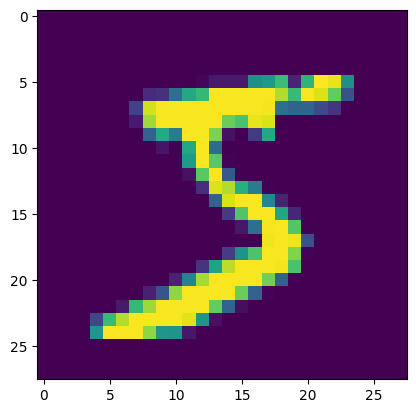

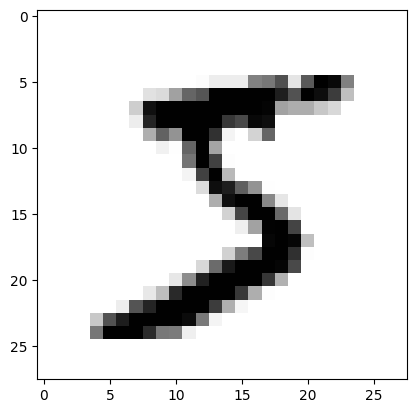

In [39]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)


In [40]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

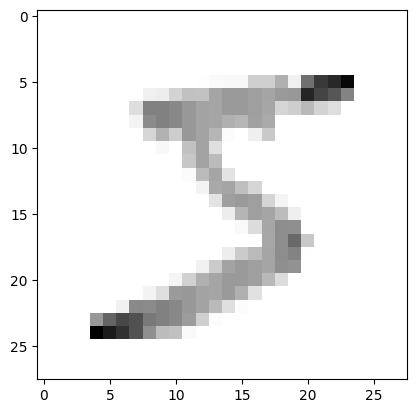

In [41]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [42]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [43]:
print(y_train[0])

5


In [44]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [46]:
model = Sequential()


model.add(Conv2D(64, (3, 3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
print(len(x_trainr))

60000


In [49]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [50]:
model.fit(x_trainr, y_train, epochs = 10, validation_split = 0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 61s 44ms/step - accuracy: 0.7951 - loss: 0.6408 - val_accuracy: 0.9655 - val_loss: 0.1104
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 85s 47ms/step - accuracy: 0.9661 - loss: 0.1089 - val_accuracy: 0.9739 - val_loss: 0.0876
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 56s 43ms/step - accuracy: 0.9788 - loss: 0.0720 - val_accuracy: 0.9789 - val_loss: 0.0691
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.9817 - loss: 0.0552 - val_accuracy: 0.9804 - val_loss: 0.0637
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - accuracy: 0.9859 - loss: 0.0440 - val_accuracy: 0.9781 - val_loss: 0.0721
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 66s 50ms/step - accuracy: 0.9891 - loss: 0.0339 - val_accuracy: 0.9818 - val_loss: 0.0631
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 62s 47ms/step - accuracy: 0.9902 - loss: 0.0305 - val_accuracy: 0.9807 - val_loss: 0.0656
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 74s 41ms/step - accuracy: 0.9923 -

In [51]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print(test_loss)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9817 - loss: 0.0832
0.07238531857728958
0.9837999939918518


In [52]:
predicions = model.predict([x_testr])

print(np.argmax(predicions[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
7


In [53]:
model.save('mnist_cnn_model2.h5')

In [54]:
import cv2

In [55]:
img = cv2.imread('eight.png')

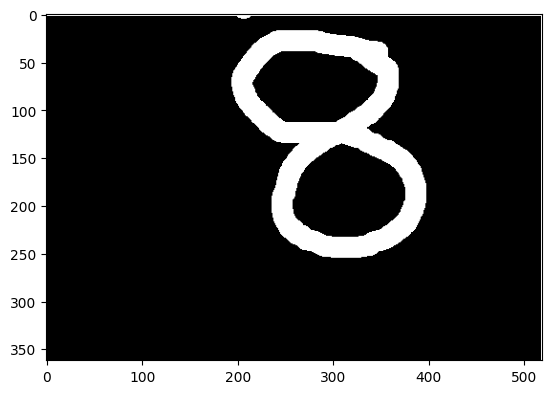

In [56]:
plt.imshow(img)

In [57]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [58]:
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)

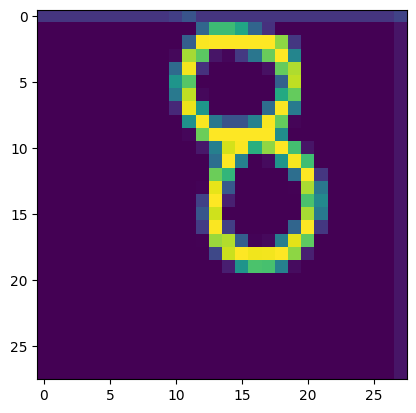

In [59]:
plt.imshow(resized)

In [60]:
resized.shape

(28, 28)

In [61]:
newimg = tf.keras.utils.normalize(resized, axis = 1)

In [62]:
newimg = np.array(newimg).reshape(-1,28,28,1)

In [63]:
newimg.shape

(1, 28, 28, 1)

In [64]:
predicions = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


In [65]:
print(np.argmax(predicions))

8
